# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="C:\\Users\\ricor\\Google Drive\\developer\\python\\deep-reinforcement-learning\\p3_collab-compet\\Tennis_Windows_x86_64\\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    for _ in range(10):
#     while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        print ("actions: {}".format(actions))
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        print ("rewards: {}".format(rewards))
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

actions: [[-0.97086262 -0.92388618]
 [-0.68993041 -1.        ]]
rewards: [0.0, 0.0]
actions: [[ 0.66797265  0.66580857]
 [ 0.32301401 -0.74278582]]
rewards: [0.0, 0.0]
actions: [[-0.0090758   0.61570413]
 [-1.         -0.20669259]]
rewards: [0.0, 0.0]
actions: [[ 1.          0.78063576]
 [-0.27483342 -0.78012279]]
rewards: [0.0, 0.0]
actions: [[ 1.          1.        ]
 [-0.88337533  1.        ]]
rewards: [0.0, 0.0]
actions: [[ 1.         -1.        ]
 [-0.11466493  0.80361473]]
rewards: [0.0, 0.0]
actions: [[-0.81472371  0.79886117]
 [-1.         -1.        ]]
rewards: [0.0, 0.0]
actions: [[1.         0.62386343]
 [0.52146467 0.76679137]]
rewards: [0.0, 0.0]
actions: [[-1.         0.6584958]
 [ 0.9507    -1.       ]]
rewards: [0.0, 0.0]
actions: [[-1.         -0.43621581]
 [-0.13217123 -0.42688401]]
rewards: [0.0, 0.0]
Score (max over agents) from episode 1: 0.0
actions: [[-1.         -1.        ]
 [ 0.45624601 -1.        ]]
rewards: [0.0, 0.0]
actions: [[ 0.59372777 -0.22606693]
 [ 0

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# !pip install requests

In [8]:
from collections import deque
import time
import numpy as np
import random

import workspace_utils
import torch
from ddpg_agent import Agent

%matplotlib inline


In [9]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=41)

In [19]:
import time

def train_multi_agent_ddpg(n_episodes = 20000, max_tsteps = 1500):
    """
    DDPG algorithm
        n_episodes: max number of episodes during training (int)
        max_t: max number of timesteps (int)
    """
    scores = list()    
    rolling_window = deque(maxlen = 100) # mean score over last 100 instances    
    mov_avg = list()
    PRINT_EVERY = 1    
    NUM_EPS_PERFORMANCE = 100    
    TARGET_SCORE = 0.5
    performance = -np.inf
    
    for ith_episode in range(1, n_episodes + 1): 
        agent.reset()
        score = 0
        scores_per_episode = np.zeros(num_agents)
        env_info = env.reset(train_mode = True)[brain_name]
        states = env_info.vector_observations
        start_time = time.time()
        
        for t_step in range(max_tsteps):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            rewards = env_info.rewards
            next_states = env_info.vector_observations
            dones = env_info.local_done
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t_step)
#             agent.step(states, actions, rewards, next_states, dones, t_step)
            states = next_states
            scores_per_episode += rewards            
            
            if np.any(dones):
                break
                
        elapsed_time = time.time() - start_time
        
        # to get an estimation of the learning progress, we'll be using a moving average
#         scores.append( list(scores_per_episode) )
#         mov_avg.append(np.mean(scores[-NUM_EPS_PERFORMANCE:], axis = 0))

        scores.append(np.max(scores_per_episode))
        rolling_window.append(scores[-1])
        mov_avg.append(np.mean(rolling_window))
                
        if not ith_episode % PRINT_EVERY:
#             print ("ma: {}".format((mov_avg[-1])))
#             print ("score: {}".format((scores[-1])))
            print ('Episode: {:3d},\tMovingAvg: {:.3f}\tMaxScore: {:.3f}\tElapsedTime: {}s' \
                    .format(ith_episode, mov_avg[-1], scores[-1], elapsed_time))
    
        if ith_episode >= NUM_EPS_PERFORMANCE and mov_avg[-1].mean() >= TARGET_SCORE:         
            print ("ENVIRONMENT SOLVED IN EPISODE : {}".format(ith_episode))
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_baseline.pth'.format(ith_episode))
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_baseline.pth'.format(ith_episode))            
            if mov_avg[-1].mean() > performance:
                performance = mov_avg[-1].mean()
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_{}.pth'.format(ith_episode))
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_{}.pth'.format(ith_episode))            
       
        # PRINT RESULTS EVERY 10 EPISODES
#         if not ith_episode % PRINT_EVERY:
#             print("EPISODE: {},\tAVG SCORE:: {:.2f}".format(ith_episode, mov_avg[-1].mean()))
    
        
    return scores, mov_avg                                                   
                
    

In [20]:
%time scores, mov_avg = train_multi_agent_ddpg()


Episode:   1,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 3.06138014793396s
Episode:   2,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.36307430267334s
Episode:   3,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.249036073684692s
Episode:   4,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.953890323638916s
Episode:   5,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.56768012046814s
Episode:   6,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.707520484924316s
Episode:   7,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.7042076587677s
Episode:   8,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.737839460372925s
Episode:   9,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 7.233802080154419s
Episode:  10,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.451153516769409s
Episode:  11,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.655395269393921s
Episode:  12,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTime: 6.500123500823975s
Episode:  13,	MovingAvg: 0.000	MaxScore: 0.000	ElapsedTim

Episode: 105,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.959812879562378s
Episode: 106,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.795757293701172s
Episode: 107,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 7.021543979644775s
Episode: 108,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.839001655578613s
Episode: 109,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 7.274679183959961s
Episode: 110,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.851777076721191s
Episode: 111,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.722318172454834s
Episode: 112,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.942230939865112s
Episode: 113,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.843378305435181s
Episode: 114,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 7.199160575866699s
Episode: 115,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.946721315383911s
Episode: 116,	MovingAvg: 0.001	MaxScore: 0.000	ElapsedTime: 6.929791212081909s
Episode: 117,	MovingAvg: 0.001	MaxScore: 0.000	Elaps

Episode: 209,	MovingAvg: 0.101	MaxScore: 0.200	ElapsedTime: 43.745688915252686s
Episode: 210,	MovingAvg: 0.101	MaxScore: 0.000	ElapsedTime: 7.3044397830963135s
Episode: 211,	MovingAvg: 0.102	MaxScore: 0.100	ElapsedTime: 24.965827465057373s
Episode: 212,	MovingAvg: 0.104	MaxScore: 0.200	ElapsedTime: 44.79218029975891s
Episode: 213,	MovingAvg: 0.104	MaxScore: 0.000	ElapsedTime: 6.793846130371094s
Episode: 214,	MovingAvg: 0.106	MaxScore: 0.200	ElapsedTime: 44.45792198181152s
Episode: 215,	MovingAvg: 0.108	MaxScore: 0.200	ElapsedTime: 43.16961932182312s
Episode: 216,	MovingAvg: 0.110	MaxScore: 0.200	ElapsedTime: 47.85085201263428s
Episode: 217,	MovingAvg: 0.111	MaxScore: 0.100	ElapsedTime: 15.876285314559937s
Episode: 218,	MovingAvg: 0.112	MaxScore: 0.100	ElapsedTime: 16.88001298904419s
Episode: 219,	MovingAvg: 0.113	MaxScore: 0.100	ElapsedTime: 19.85245180130005s
Episode: 220,	MovingAvg: 0.114	MaxScore: 0.100	ElapsedTime: 16.199029445648193s
Episode: 221,	MovingAvg: 0.115	MaxScore: 0.100	

Episode: 313,	MovingAvg: 0.486	MaxScore: 2.600	ElapsedTime: 480.1114909648895s
Episode: 314,	MovingAvg: 0.498	MaxScore: 1.400	ElapsedTime: 255.9455361366272s
Episode: 315,	MovingAvg: 0.503	MaxScore: 0.700	ElapsedTime: 127.80626559257507s
ENVIRONMENT SOLVED IN EPISODE : 315
done!
Wall time: 3h 29min 36s


In [23]:
import pickle
results = {'scores': scores, 'movavg': mov_avg}
with open('ddpg_tennis_results', 'wb') as f:
    pickle.dump(results, f)


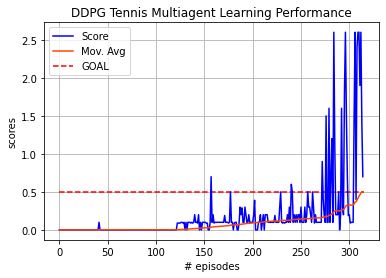

In [49]:
import matplotlib.pyplot as plt

TARGET_SCORE = 0.5
#create horizonal line indicating minimum goal level
target = [TARGET_SCORE] * len(scores)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('DDPG Tennis Multiagent Learning Performance')
ax.plot(scores, label = 'Score', color = 'blue', )
ax.plot(mov_avg, label = 'Mov. Avg', color = 'orangered', linestyle='-', )
ax.hlines(y = 0.5, xmin = 0, xmax = len(scores), linestyle = '--', color = 'red', label = 'GOAL')
ax.grid()
ax.set_xlabel('# episodes')
ax.set_ylabel('scores')
plt.legend()
